In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# 1. Data exploration

In [3]:
root_dir="/home/pliu/data_set/insee_income"
geo_path=f"{root_dir}/name_geographic_information.csv"
industry_path=f"{root_dir}/base_etablissement_par_tranche_effectif.csv"
salary_path=f"{root_dir}/net_salary_per_town_categories.csv"
geography = pd.read_csv(geo_path)
industry = pd.read_csv(industry_path)
salary = pd.read_csv(salary_path)

In [4]:
geography.head(3)

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51


In [5]:
geography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EU_circo                36840 non-null  object 
 1   code_région             36840 non-null  int64  
 2   nom_région              36840 non-null  object 
 3   chef.lieu_région        36840 non-null  object 
 4   numéro_département      36840 non-null  object 
 5   nom_département         36840 non-null  object 
 6   préfecture              36840 non-null  object 
 7   numéro_circonscription  36840 non-null  int64  
 8   nom_commune             36840 non-null  object 
 9   codes_postaux           36840 non-null  object 
 10  code_insee              36840 non-null  int64  
 11  latitude                33911 non-null  float64
 12  longitude               33999 non-null  object 
 13  éloignement             33878 non-null  float64
dtypes: float64(2), int64(3), object(9)
mem

In [6]:
industry.head(5)

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


In [7]:
industry.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36681 entries, 0 to 36680
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CODGEO    36681 non-null  object
 1   LIBGEO    36681 non-null  object
 2   REG       36681 non-null  int64 
 3   DEP       36681 non-null  object
 4   E14TST    36681 non-null  int64 
 5   E14TS0ND  36681 non-null  int64 
 6   E14TS1    36681 non-null  int64 
 7   E14TS6    36681 non-null  int64 
 8   E14TS10   36681 non-null  int64 
 9   E14TS20   36681 non-null  int64 
 10  E14TS50   36681 non-null  int64 
 11  E14TS100  36681 non-null  int64 
 12  E14TS200  36681 non-null  int64 
 13  E14TS500  36681 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 3.9+ MB


In [8]:
salary.head(5)

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,1004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,1007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,1014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,1024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,1025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9


In [9]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136 entries, 0 to 5135
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODGEO     5136 non-null   object 
 1   LIBGEO     5136 non-null   object 
 2   SNHM14     5136 non-null   float64
 3   SNHMC14    5136 non-null   float64
 4   SNHMP14    5136 non-null   float64
 5   SNHME14    5136 non-null   float64
 6   SNHMO14    5136 non-null   float64
 7   SNHMF14    5136 non-null   float64
 8   SNHMFC14   5136 non-null   float64
 9   SNHMFP14   5136 non-null   float64
 10  SNHMFE14   5136 non-null   float64
 11  SNHMFO14   5136 non-null   float64
 12  SNHMH14    5136 non-null   float64
 13  SNHMHC14   5136 non-null   float64
 14  SNHMHP14   5136 non-null   float64
 15  SNHMHE14   5136 non-null   float64
 16  SNHMHO14   5136 non-null   float64
 17  SNHM1814   5136 non-null   float64
 18  SNHM2614   5136 non-null   float64
 19  SNHM5014   5136 non-null   float64
 20  SNHMF181

## 2. Data validation

## 3. Data validation

## 4. Data transformation

### 4.1 Drop useless column

In [10]:
geography.drop(['EU_circo', 'code_région', 'éloignement', 'numéro_département', 'nom_département', 'préfecture', 'numéro_circonscription', 'codes_postaux'], axis=1, inplace=True)

### 4.2 Clean column name
As the column name is the main index when we select data, we usually make it clean and clear. Clean means no special character(e.g. . *, @ or character with accent). Clear means, it should tell what's information in this column

In [11]:
geography.rename(columns={'nom_région': 'nom_region',
                          'chef.lieu_région': 'chef_lieu_region',
                          },inplace=True)

In [12]:
geography.head(3)

,nom_region,chef_lieu_region,nom_commune,code_insee,latitude,longitude
0,Rhône-Alpes,Lyon,Attignat,1024,46.283333,5.166667
1,Rhône-Alpes,Lyon,Beaupont,1029,46.400000,5.266667
2,Rhône-Alpes,Lyon,Bény,1038,46.333333,5.283333


In [13]:
geography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nom_region        36840 non-null  object 
 1   chef_lieu_region  36840 non-null  object 
 2   nom_commune       36840 non-null  object 
 3   code_insee        36840 non-null  int64  
 4   latitude          33911 non-null  float64
 5   longitude         33999 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ MB


You can notice the type of longitude is wrong (It should be a float, but we get a str). We need to find out why.

In below example, we write a regular expression, to test if a string has the format of a float or not.

In [28]:
import re
test1="123"
test2="123.12"
test3="0.123"
test4="0,123"
test5="toto.23"
pattern="[+-]?([0-9]+)([.][0-9]+)?"

result1=re.match(pattern,test1)
print(f"result 1: {result1}")

result2=re.match(pattern,test2)
print(f"result 2: {result2}")

result3=re.match(pattern,test3)
print(f"result 3: {result3}")

result4=re.match(pattern,test4)
print(f"result 4: {result4}")

result5=re.match(pattern,test5)
print(f"result 5: {result5}")

print(type(result5))

result 1: <re.Match object; span=(0, 3), match='123'>
result 2: <re.Match object; span=(0, 6), match='123.12'>
result 3: <re.Match object; span=(0, 5), match='0.123'>
result 4: <re.Match object; span=(0, 1), match='0'>
result 5: None
<class 'NoneType'>


We can use the below pandas match() method to filter out the anomalies.

In [39]:
anomaly_df=geography[(geography["longitude"].str.match(r'[+-]?([0-9]*)[.][0-9]+')==False)& (geography["longitude"].str.match(r'[+-]?[0-9]+')==False) & (geography["longitude"].str.match(r'nan')==False) ]
anomaly_df.head(5)

,nom_region,chef_lieu_region,nom_commune,code_insee,latitude,longitude
5111,Basse-Normandie,Caen,Vaudeloges,14729,48.950000,-
5172,Basse-Normandie,Caen,Gerrots,14300,49.200000,-
5182,Basse-Normandie,Caen,Heuland,14329,49.266667,-
5236,Basse-Normandie,Caen,Saint-Vaast-en-Auge,14660,49.283333,-
5248,Basse-Normandie,Caen,Villers-sur-Mer,14754,49.316667,-


We find anomally such as:
- float use `,` instead of `.` as separator.
- use '-' as null value
- use 'nan' as null value

So we need to correct all the above anomaly

In [30]:
# 1
geography["longitude"] = geography["longitude"].apply(lambda x: str(x).replace(',','.'))

In [40]:
# 2 delete all column that has -
mask = geography["longitude"] == '-'
geography.drop(geography[mask].index, inplace=True)

# 3 delete all null on longitude et latitude
geography.dropna(subset = ["longitude", "latitude"], inplace=True)

# 4 convert longitude column from str to float
geography["longitude"] = geography["longitude"].astype(float)

In [41]:
# 5. drop duplicates
geography.drop_duplicates(subset=["code_insee"], keep="first", inplace=True)

Let's create new feature and count the distance in a straight line to the center of Paris. We will define an auxiliary function that will help us to calculate distances based on coordinates.

In [43]:
paris_lat = geography.loc[geography["nom_commune"] == "Paris"].iloc[0]["latitude"]
paris_lon = geography.loc[geography["nom_commune"] == "Paris"].iloc[0]["longitude"]

In [44]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    #lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

distances = []

for index, row in geography.iterrows():
    distances.append(haversine(row["longitude"], row["latitude"], paris_lon, paris_lat))

In [45]:
geography["distance"] = pd.Series(distances, index=geography.index)

# Clean industry data frame
In industry data frame, we are going to switch "CODGEO" column type from object (string) to int, but first we need to get rid of incorrect rows. Some of the rows contain non-numeric characters. We will select only those values that can be transformed into numbers.

In [46]:
industry = industry[industry["CODGEO"].apply(lambda x: str(x).isdigit())]
industry["CODGEO"] = industry["CODGEO"].astype(int)

The criteria for defining the size of a business differ from country to country. According to the European Commission, we can divide enterprises info five categories based on number of employees:
- Micro < 10,
- Small < 50,
- Medium < 250,
- Large < 1000
- Enterprise > 1000.

Let's create new columns that will be closer to representing those official categories. We will also create columns that will represent percentage of total number of businesses that is represented by each category.

We will ignore 'E14TS0ND' column because we don't know anything concrete about those firms.

In [47]:
industry['Micro'] = industry['E14TS1'] + industry['E14TS6']
industry['Small'] = industry['E14TS10'] + industry['E14TS20']
industry['Medium'] = industry['E14TS50'] + industry['E14TS100']
industry['Large_and_Enterprise'] = industry['E14TS200'] + industry['E14TS500']

industry['Sum'] = industry['E14TS1'] + industry['E14TS6'] + industry['E14TS10'] + industry['E14TS20'] + industry['E14TS50'] + industry['E14TS100'] + industry['E14TS200'] + industry['E14TS500']

In [48]:
industry['Micro%'] = industry['Micro'] * 100 / industry['Sum']
industry['Small%'] = industry['Small'] * 100 / industry['Sum']
industry['Medium%'] = industry['Medium'] * 100 / industry['Sum']
industry['Large_and_Enterprise%'] = industry['Large_and_Enterprise'] * 100 / industry['Sum']

In [49]:
relevant_columns = [
    'CODGEO',
    'LIBGEO', 'REG', 'DEP',
    'Sum', 'Micro', 'Small', 'Medium', 'Large_and_Enterprise',
    'Micro%', 'Small%', 'Medium%', 'Large_and_Enterprise%'
]
industry = industry[relevant_columns]

In [50]:
industry["DEP"] = industry["DEP"].astype(int)
industry.head()

,CODGEO,LIBGEO,REG,DEP,Sum,Micro,Small,Medium,Large_and_Enterprise,Micro%,Small%,Medium%,Large_and_Enterprise%
0,1001,L'Abergement-Clémenciat,82,1,3,3,0,0,0,100.000000,0.000000,0.000000,0.000000
1,1002,L'Abergement-de-Varey,82,1,1,1,0,0,0,100.000000,0.000000,0.000000,0.000000
2,1004,Ambérieu-en-Bugey,82,1,419,335,70,12,2,79.952267,16.706444,2.863962,0.477327
3,1005,Ambérieux-en-Dombes,82,1,26,23,3,0,0,88.461538,11.538462,0.000000,0.000000
4,1006,Ambléon,82,1,0,0,0,0,0,NaN,NaN,NaN,NaN


### Salary dataset preprocessing

NOTE: Same to industry, the "CODGEO" column has been loaded as object(str) type. We need to convert it to int.

In [51]:
salary = salary[salary["CODGEO"].apply(lambda x: str(x).isdigit())]
salary["CODGEO"] = salary["CODGEO"].astype(int)

In [95]:
salary.head()

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,1004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,1007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,1014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,1024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,1025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9


In [96]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5107 entries, 0 to 5135
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODGEO     5107 non-null   int64  
 1   LIBGEO     5107 non-null   object 
 2   SNHM14     5107 non-null   float64
 3   SNHMC14    5107 non-null   float64
 4   SNHMP14    5107 non-null   float64
 5   SNHME14    5107 non-null   float64
 6   SNHMO14    5107 non-null   float64
 7   SNHMF14    5107 non-null   float64
 8   SNHMFC14   5107 non-null   float64
 9   SNHMFP14   5107 non-null   float64
 10  SNHMFE14   5107 non-null   float64
 11  SNHMFO14   5107 non-null   float64
 12  SNHMH14    5107 non-null   float64
 13  SNHMHC14   5107 non-null   float64
 14  SNHMHP14   5107 non-null   float64
 15  SNHMHE14   5107 non-null   float64
 16  SNHMHO14   5107 non-null   float64
 17  SNHM1814   5107 non-null   float64
 18  SNHM2614   5107 non-null   float64
 19  SNHM5014   5107 non-null   float64
 20  SNHMF181

## Join data frame
Here, we join the industry data frame with geography data to has an idea what enterprise is where


In [52]:
full_data = industry.merge(geography, how="left", left_on = "CODGEO", right_on="code_insee")

In [54]:
full_data.head(5)

,CODGEO,LIBGEO,REG,DEP,Sum,Micro,Small,Medium,Large_and_Enterprise,Micro%,Small%,Medium%,Large_and_Enterprise%,nom_region,chef_lieu_region,nom_commune,code_insee,latitude,longitude,distance
0,1001,L'Abergement-Clémenciat,82,1,3,3,0,0,0,100.000000,0.000000,0.000000,0.000000,Rhône-Alpes,Lyon,L'Abergement-Clémenciat,1001.0,46.15,4.916667,358.978958
1,1002,L'Abergement-de-Varey,82,1,1,1,0,0,0,100.000000,0.000000,0.000000,0.000000,Rhône-Alpes,Lyon,L'Abergement-de-Varey,1002.0,46.00,5.416667,394.127237
2,1004,Ambérieu-en-Bugey,82,1,419,335,70,12,2,79.952267,16.706444,2.863962,0.477327,Rhône-Alpes,Lyon,Ambérieu-en-Bugey,1004.0,45.95,5.350000,395.804017
3,1005,Ambérieux-en-Dombes,82,1,26,23,3,0,0,88.461538,11.538462,0.000000,0.000000,Rhône-Alpes,Lyon,Ambérieux-en-Dombes,1005.0,46.00,4.900000,372.612289
4,1006,Ambléon,82,1,0,0,0,0,0,NaN,NaN,NaN,NaN,Rhône-Alpes,Lyon,Ambléon,1006.0,45.75,5.600000,425.071949


## Data application

### Data viz

Let's look at it from a bird's eye view

NOTE: First, let's make a map of France, on which we mark all the cities from the dataset. For this task we will use Basemap library. Each city is represented by a separate circle. The radius and color of the circles will reflect the number of jobs in the city. When the dataset will be expanded, the color can reflect the value of another feature. Due to the disproportionate value for Paris we use a logarithmic scale.

In [55]:
# Creating DataFrame containing cities with the highiest number of workplaces
top_industry = full_data.sort_values(by=["Sum"], ascending=False).head(10)

In [56]:
# Preparing information to mark cities with highiest number of workplaces
top_industry_names = top_industry["LIBGEO"].values.tolist()
top_industry_lons = top_industry["longitude"].values.tolist()
top_industry_lats = top_industry["latitude"].values.tolist()

In [59]:
lons = full_data["longitude"].values.tolist()
lats = full_data["latitude"].values.tolist()
size = (full_data["Sum"]/5).values.tolist()

## Draw the cities on french map

Below code will draw a circle on each city that has a row in the data set. The size of the circle depends on

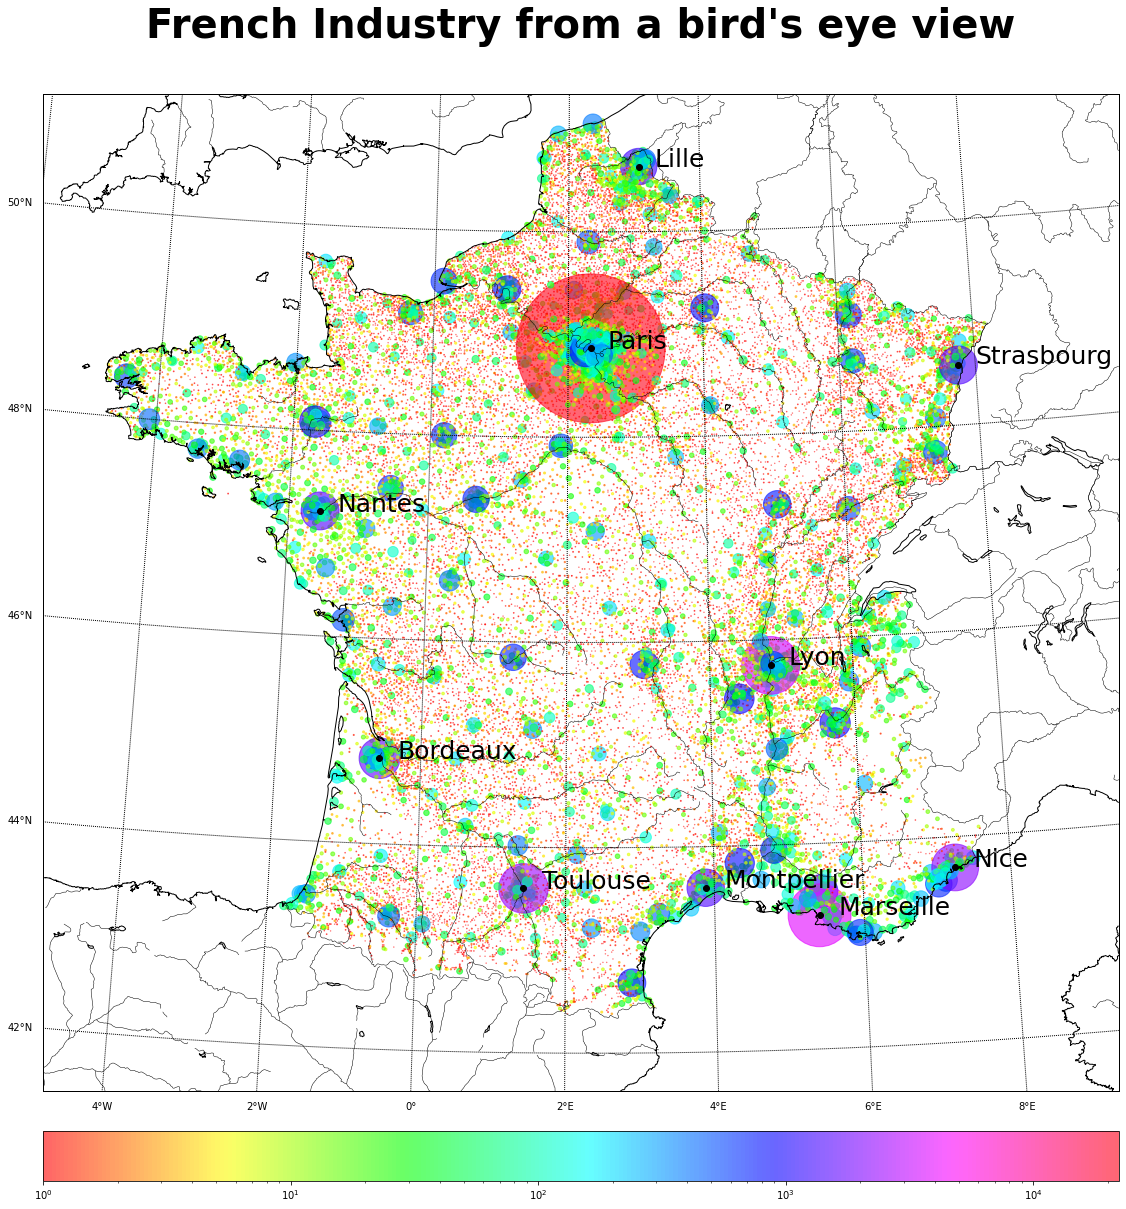

In [60]:
# Creating new plot
plt.figure(figsize=(20,20))
# Load map of France
map = Basemap(projection='lcc',
            lat_0=46.2374,
            lon_0=2.375,
            resolution='h',
            llcrnrlon=-4.76, llcrnrlat=41.39,
            urcrnrlon=10.51, urcrnrlat=51.08)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()

# Draw scatter plot with all cities
x,y = map(lons, lats)
map.scatter(x, y, s=size, alpha=0.6, c=size, norm=colors.LogNorm(vmin=1, vmax=max(size)), cmap='hsv')
map.colorbar(location="bottom", pad="4%")

# Draw scatter plot of cities with highiest number of workplaces
x1, y1 = map(top_industry_lons, top_industry_lats)
map.scatter(x1, y1, c="black")

for i in range(len(top_industry_names)):
    plt.annotate(top_industry_names[i], xy=(map(top_industry_lons[i] + 0.25,  top_industry_lats[i])), fontsize=25)

plt.title("French Industry from a bird's eye view", fontsize=40, fontweight='bold', y=1.05)

plt.show()

Right away we see that Paris is city with the highest number of workplaces in France. I also marked nine other cities that are top job providers. Traditionally, the large city was founded near the river and on the coast. Three of top ten cities from our dataset [Montpellier, Marseille and Nice] are located on French Riviera. Let's take a closer look at this part of France.

## Zoom on a single zone (french Riviera aka. Côte d'Azur)

In [62]:
# Lets cut smaller cut of the map and focus on  French Riviera
lons_min = 3
lons_max = 8
lats_min = 42.5
lats_max = 45

mask_lons = (full_data["longitude"] > lons_min) & (full_data["longitude"] < lons_max)
mask_lats = (full_data["latitude"] > lats_min) & (full_data["latitude"] < lats_max)
franch_riviera = full_data[mask_lons & mask_lats]

lons = franch_riviera["longitude"].values.tolist()
lats = franch_riviera["latitude"].values.tolist()
size = (franch_riviera["Sum"]/2).values.tolist()

# Creating DataFrame containing cities with the highiest number of workplaces
top_industry = franch_riviera.sort_values(by=["Sum"], ascending=False).head(5)

# Preparing information to mark cities with highiest number of workplaces
top_industry_names = top_industry["LIBGEO"].values.tolist()
top_industry_lons = top_industry["longitude"].values.tolist()
top_industry_lats = top_industry["latitude"].values.tolist()

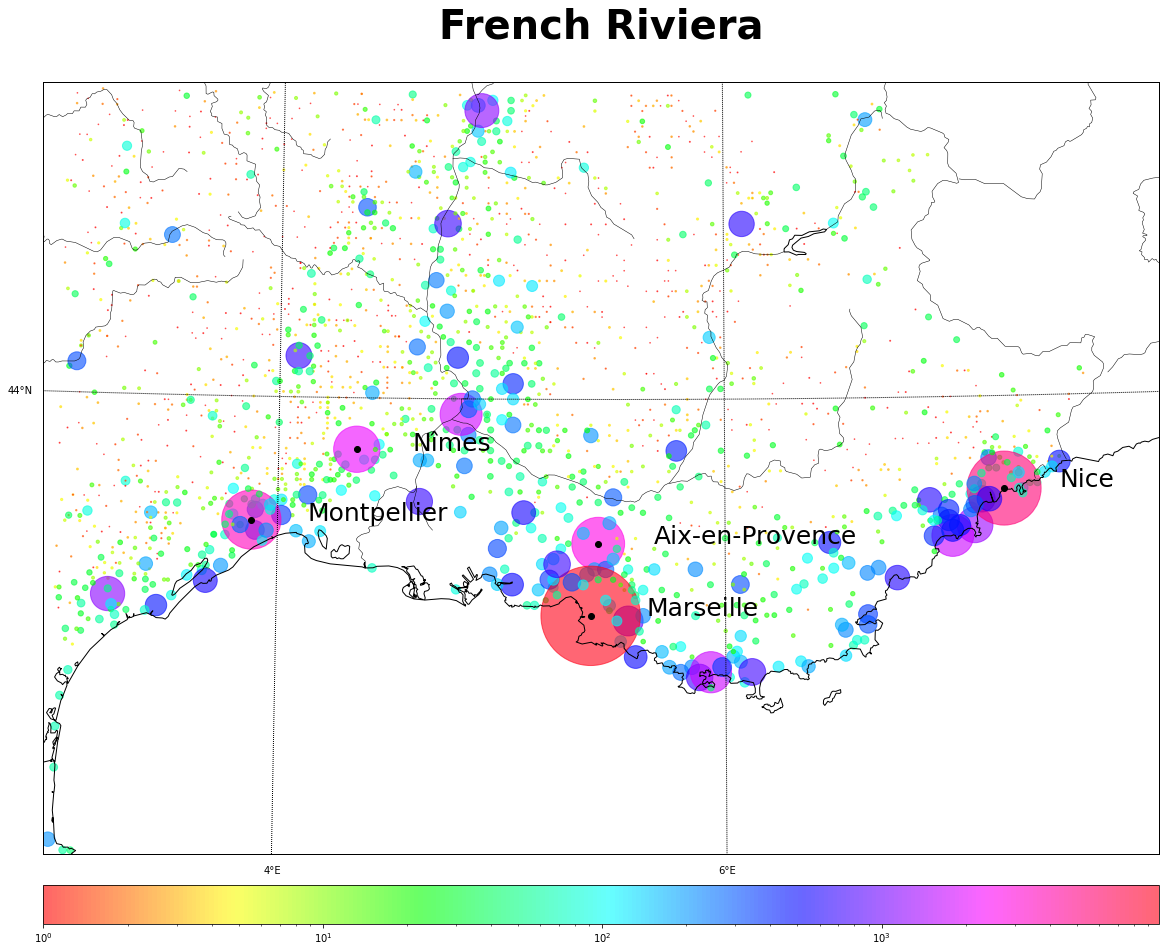

In [63]:
# Creating new plot
plt.figure(figsize=(20,20))
# Load map of France
map = Basemap(projection='lcc',
            lat_0=(lats_min + lats_max)/2,
            lon_0=(lons_min + lons_max)/2,
            resolution='h',
            llcrnrlon=lons_min, llcrnrlat=lats_min,
            urcrnrlon=lons_max, urcrnrlat=lats_max)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()
# Draw scatter plot with all cities
x,y = map(lons, lats)
map.scatter(x, y, s=size, alpha=0.6, c=size, norm=colors.LogNorm(vmin=1, vmax=max(size)), cmap='hsv')
map.colorbar(location="bottom", pad="4%")

# Draw scatter plot of cities with highiest number of workplaces
x1, y1 = map(top_industry_lons, top_industry_lats)
map.scatter(x1, y1, c="black")

for i in range(len(top_industry_names)):
    plt.annotate(top_industry_names[i], xy=(map(top_industry_lons[i] + 0.25,  top_industry_lats[i])), fontsize=25)

plt.title("French Riviera", fontsize=40, fontweight='bold', y=1.05)

plt.show()

## Visualize the business number of top 10 cities

Let's choose the ten cities with the most jobs. The line graph reflects the total number of jobs in the city. Bar charts reflect the distribution of companies according to their size for each city separately.

In [64]:
# Creating DataFrame containing cities with the highest number of workplaces
powerhouse = full_data.sort_values(by=["Sum"], ascending=False).head(10)

Below code will draw the bar plot

In [65]:

trace1 = go.Bar(
    x = powerhouse["LIBGEO"].tolist(),
    y = powerhouse["Micro%"].tolist(),
    name='Micro %',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)

trace2 = go.Bar(
    x = powerhouse["LIBGEO"].tolist(),
    y = powerhouse["Small%"].tolist(),
    name='Small %',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Bar(
    x = powerhouse["LIBGEO"].tolist(),
    y = powerhouse["Medium%"].tolist(),
    name='Medium %',
    marker=dict(
        color='rgba(0, 168, 107, 0.7)',
        line=dict(
            color='rgba(0, 168, 107, 1.0)',
            width=2,
        )
    )
)

trace4 = go.Bar(
    x = powerhouse["LIBGEO"].tolist(),
    y = powerhouse['Large_and_Enterprise%'].tolist(),
    name='Large and Enterprise %',
    marker=dict(
        color='rgba(250, 92, 0, 0.7)',
        line=dict(
            color='rgba(250, 92, 0, 1.0)',
            width=2,
        )
    )
)

trace5 = go.Scatter(
    x = powerhouse["LIBGEO"].tolist(),
    y = powerhouse['Sum'].tolist(),
    name='Total number of businesses',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Paris is economic powerhouse',
    titlefont=dict(size=25),
    width=850,
    height=600,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Percentage of total businesses per city',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Major french cities'),
    yaxis2=dict(
        title='Number of businesses per city',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 13000
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.65, y=0.45)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Visualize the business number for each region

Let's group the data on the basis of region name, sum up the number of jobs in all cities in the given region and sort them in descending order. Then mark the regions on the map. The color of the bar graph corresponds to the color on the map.

In [67]:
regions = full_data[["nom_region", "Sum"]].groupby("nom_region").sum().sort_values("Sum", ascending=False).reset_index().reset_index()
regions.rename(columns={'index': 'region_rank',}, inplace=True)
regions_labels = regions["nom_region"].tolist()
regions_sums = regions["Sum"].tolist()

In [69]:
trace1 = go.Bar(
    x = regions_labels,
    y = regions_sums,
    name='Number of businesses',
    marker=dict(
        color=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        colorscale='Jet',
        line=dict(
            color='rgb(0, 0, 0)',
            width=1
        )
    ),
    opacity=0.6
)

data = [trace1]

layout = go.Layout(
    barmode='stack',
    title = 'Regions with the highiest number of workplaces',
    titlefont=dict(size=25),
    width=850,
    height=500,
    margin=go.layout.Margin(
        l=75,
        r=75,
        b=120,
        t=100,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Number of businesses per region',
        anchor = 'x',
        rangemode='tozero'
    ),
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [70]:
# join the region business number with the full data
by_regions = full_data.merge(regions[["nom_region", "region_rank"]], how="left", on="nom_region" )

In [71]:
lons = by_regions["longitude"].values.tolist()
lats = by_regions["latitude"].values.tolist()
size = (by_regions["Sum"]/5).values.tolist()
region = by_regions["region_rank"].values.tolist()

In [73]:
regions_capitals = by_regions[by_regions["chef_lieu_region"] == by_regions["nom_commune"]]

lons_capital = regions_capitals["longitude"].values.tolist()
lats_capital = regions_capitals["latitude"].values.tolist()
names_region = regions_capitals["nom_region"].values.tolist()

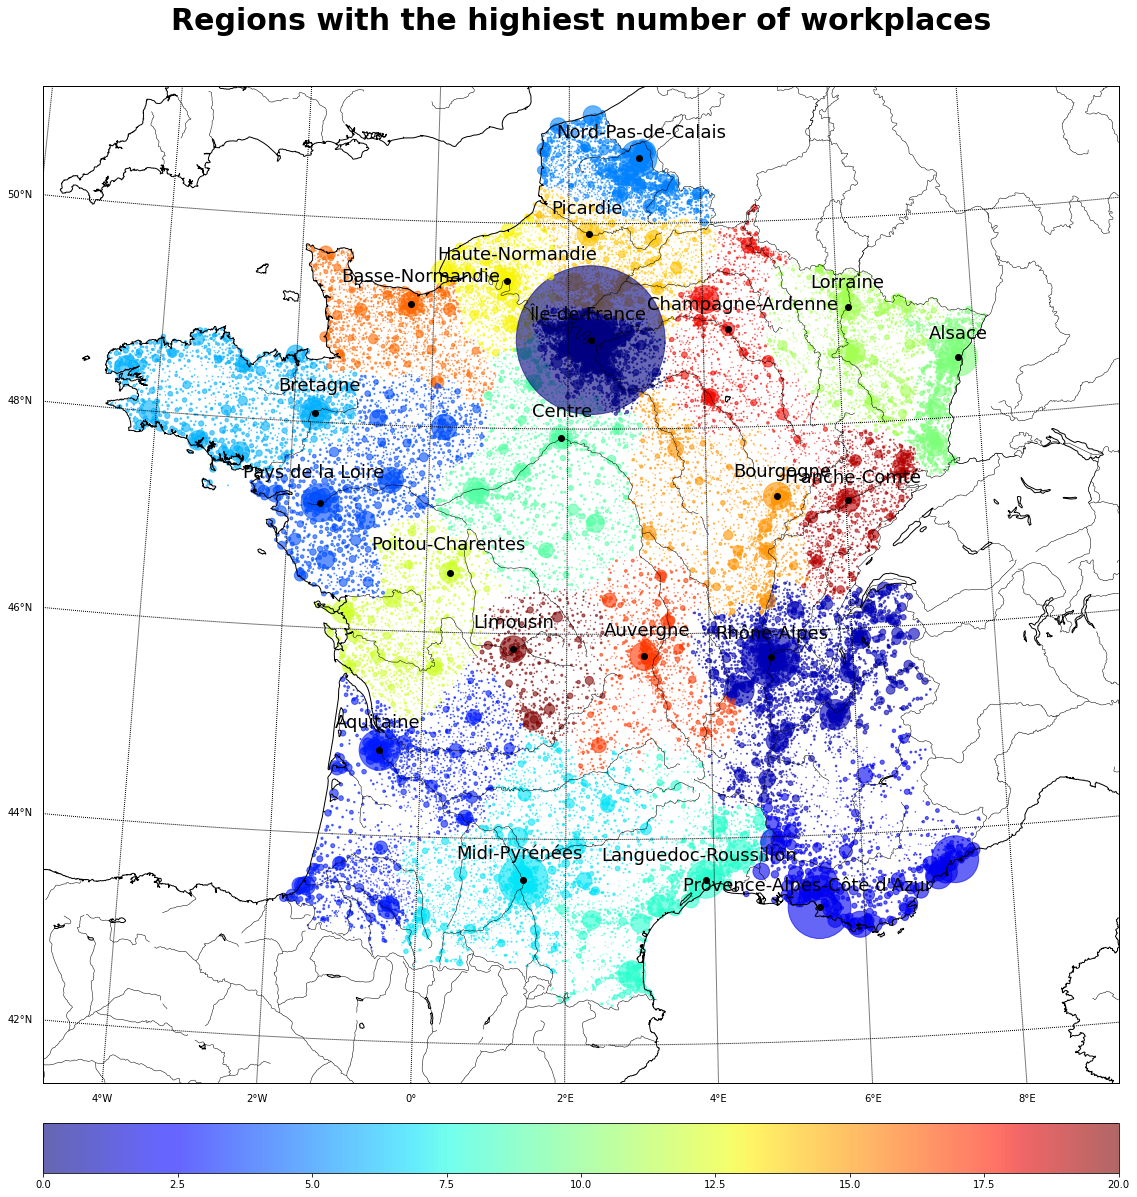

In [74]:
# Creating new plot
plt.figure(figsize=(20,20))
# Load map of France
map = Basemap(projection='lcc',
            lat_0=46.2374,
            lon_0=2.375,
            resolution='h',
            llcrnrlon=-4.76, llcrnrlat=41.39,
            urcrnrlon=10.51, urcrnrlat=51.08)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()


# Draw scatter plot with all cities
x,y = map(lons, lats)
map.scatter(x, y, s=size, alpha=0.6, c=region, cmap='jet')
map.colorbar(location="bottom", pad="4%")

# Draw scatter plot of cities with highiest number of workplaces
x1, y1 = map(lons_capital, lats_capital)
map.scatter(x1, y1, c="black")

for i in range(len(names_region)):
    plt.annotate(names_region[i], xy=(map(lons_capital[i] - 0.07 * len(names_region[i]),  lats_capital[i] + 0.2)), fontsize=18)

plt.title("Regions with the highiest number of workplaces", fontsize=30, fontweight='bold', y=1.05)

plt.show()

 ## Vizu of salary

We will see the `Pay Gap between gender` in france. We will use the data in the salaries file, and we calculate the average value of the average earnings in cities. Then we create graphs based on the occupied position and age.

In [75]:
positions = ["Executive", "Middle manager", "Employee", "Worker"]
woman_positions = ["SNHMFC14", "SNHMFP14", "SNHMFE14", "SNHMFO14"]
woman_salary_positions = salary[woman_positions].mean().tolist()
man_positions = ["SNHMHC14", "SNHMHP14", "SNHMHE14", "SNHMHO14"]
man_salary_positions = salary[man_positions].mean().tolist()

dif_in_prc = []
for w, m in zip(woman_salary_positions, man_salary_positions):
    dif_in_prc.append(round(abs(w-m)/m * 100, 2))

In [76]:
trace1 = go.Bar(
    x = positions,
    y = woman_salary_positions,
    name='Women',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = positions,
    y = man_salary_positions,
    name='Men',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = positions,
    y = dif_in_prc,
    name='Earnings difference',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title = 'Stereotype is real',
    width=850,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Average earnings [€/hour]',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Position'),

    yaxis2=dict(
        title='Earnings difference',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
         overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 8
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.05, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

The conclusion is positive. There is a salary gap between man and women.

Now, let's see if this cap persist with age

In [77]:
age = ["18-25 years old", "26-50 years old", ">50 years old"]
woman_age = ["SNHMF1814", "SNHMF2614", "SNHMF5014"]
woman_salary_age = salary[woman_age].mean().tolist()
man_age = ["SNHMH1814", "SNHMH2614", "SNHMH5014"]
man_salary_age = salary[man_age].mean().tolist()

dif_in_prc_age = []
for w, m in zip(woman_salary_age, man_salary_age):
    dif_in_prc_age.append(round(abs(w-m)/m * 100, 2))

In [79]:
trace1 = go.Bar(
    x = age,
    y = woman_salary_age,
    name='Women',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = age,
    y = man_salary_age,
    name='Men',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = age,
    y = dif_in_prc_age,
    name='Earnings difference',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title = 'Income cap between gender with age',
     width=850,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Average earnings [€/hour]',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Age'),

    yaxis2=dict(
        title='Earnings difference',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
         dtick = 7.3
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.72, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

You can notice `Age` make the income cap even worse.

## Wealth inequality Viz

Let's check how much people earn across French cities.


In [80]:
salary_by_location = salary.sort_values("SNHM14", ascending=False)[["LIBGEO", "SNHM14"]]
salary_by_location.drop_duplicates("LIBGEO", inplace=True)
locations = salary_by_location["LIBGEO"].values
wage = salary_by_location["SNHM14"].values
samples = list(range(len(locations)))


In [89]:
trace1 = go.Bar(
    x = locations,
    y = wage,
    name='Wealth inequality',
    marker=dict(
        color=samples,
        colorscale='Jet',
    ),
    opacity=0.6
)

data = [trace1]

layout = go.Layout(
    barmode='stack',
    title = 'Wealth inequality',
    titlefont=dict(size=25),
    width=850,
    height=500,
    margin=go.layout.Margin(
        l=75,
        r=20,
        b=60,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    xaxis=dict(
        title= 'Cities',
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        tickmode="auto",
        ticks='',
        showticklabels=False
    ),
    yaxis = dict(
        title= 'Average earnings [€/hour]',
        anchor = 'x',
        rangemode='tozero'
    ),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

The vast majority of residents earn very similar wage, nevertheless there is a small group breaking out above average. Let's see if we can get some more information on the richest fraction of society. First we will link earnings and location information.

In [90]:
salary_location = salary.merge(geography, how="left", left_on='CODGEO', right_on="code_insee")

In [91]:
salary_by_location = salary_location.sort_values("SNHM14", ascending=False)[["LIBGEO", "SNHM14", "distance"]]

In [92]:
#  Let's select all locations with mean net salary over 30 €/hour.

top_locations = salary_by_location[salary_by_location["SNHM14"] > 30]
locations = top_locations["LIBGEO"].values
wage = top_locations["SNHM14"].values
distance = top_locations["distance"].values

In [94]:
trace1 = go.Scatter(
    x = top_locations["LIBGEO"].values,
    y = top_locations["SNHM14"].values,
    name='Mean net salary',
    mode = 'lines+markers',
)

trace2 = go.Scatter(
    x = top_locations["LIBGEO"].values,
    y = top_locations["distance"].values,
    name='Distance from the center of Paris',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2]

layout = go.Layout(
    title = 'Most expensive districts near Paris',
    titlefont=dict(size=25),
    width=850,
    height=600,
    margin=go.layout.Margin(
        l=75,
        r=100,
        b=100,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Average earnings [€/hour]',
        anchor = 'x',
        rangemode='tozero'
    ),
     yaxis2=dict(
        title='Distance from the center of Paris [km]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 9.27
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.55, y=0.15)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)